In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR100
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split, ConcatDataset
import torchvision.transforms as tt

In [3]:
stats = ((0.5074,0.4867,0.4411),(0.2011,0.1987,0.2025))
train_transform = tt.Compose([
    tt.RandomHorizontalFlip(),
    tt.RandomCrop(32, padding=4, padding_mode="reflect"),
    tt.ToTensor(),
    tt.Normalize(*stats)
])

test_transform = tt.Compose([
    tt.ToTensor(),
    tt.Normalize(*stats)
])

In [4]:
train_data = CIFAR100(download=True, root="./data", transform=train_transform)
test_data = CIFAR100(root="./data", train=False, transform=test_transform)

Files already downloaded and verified


In [5]:
for image, label in train_data:
    print("Image shape: ",image.shape)
    print("Image tensor: ", image)
    print("Label: ", label)
    break

Image shape:  torch.Size([3, 32, 32])
Image tensor:  tensor([[[ 2.4300,  2.4495,  2.4300,  ...,  0.9090,  0.5385,  0.2850],
         [ 2.4300,  2.4495,  2.4300,  ...,  0.3240,  0.5190,  0.4800],
         [ 2.4300,  2.4495,  2.4300,  ...,  0.1875,  0.9285,  0.9675],
         ...,
         [ 0.2460,  0.3630,  0.2460,  ..., -1.6846, -1.9381, -1.2556],
         [ 0.5970,  0.4605,  0.5970,  ..., -1.0216, -1.5676, -1.1581],
         [ 0.8115,  0.6750,  0.8115,  ..., -0.4756, -1.0996, -0.9436]],

        [[ 2.5636,  2.5833,  2.5636,  ...,  0.8268,  0.7873,  0.5505],
         [ 2.5636,  2.5833,  2.5636,  ..., -0.3179,  0.5110,  0.6886],
         [ 2.5833,  2.5833,  2.5833,  ..., -0.5350,  0.7478,  1.2018],
         ...,
         [ 1.1426,  1.2018,  1.1426,  ..., -1.8179, -2.1139, -1.2258],
         [ 1.5373,  1.3794,  1.5373,  ..., -1.2258, -1.7784, -1.2653],
         [ 1.7149,  1.5767,  1.7149,  ..., -0.7324, -1.3442, -1.1271]],

        [[ 2.7406,  2.7600,  2.7406,  ...,  0.3199,  0.1069,  0

In [6]:
train_classes_items = dict()

for train_item in train_data:
    label = train_data.classes[train_item[1]]
    if label not in train_classes_items:
        train_classes_items[label] = 1
    else:
        train_classes_items[label] += 1

train_classes_items

{'cattle': 500,
 'dinosaur': 500,
 'apple': 500,
 'boy': 500,
 'aquarium_fish': 500,
 'telephone': 500,
 'train': 500,
 'cup': 500,
 'cloud': 500,
 'elephant': 500,
 'keyboard': 500,
 'willow_tree': 500,
 'sunflower': 500,
 'castle': 500,
 'sea': 500,
 'bicycle': 500,
 'wolf': 500,
 'squirrel': 500,
 'shrew': 500,
 'pine_tree': 500,
 'rose': 500,
 'television': 500,
 'table': 500,
 'possum': 500,
 'oak_tree': 500,
 'leopard': 500,
 'maple_tree': 500,
 'rabbit': 500,
 'chimpanzee': 500,
 'clock': 500,
 'streetcar': 500,
 'cockroach': 500,
 'snake': 500,
 'lobster': 500,
 'mountain': 500,
 'palm_tree': 500,
 'skyscraper': 500,
 'tractor': 500,
 'shark': 500,
 'butterfly': 500,
 'bottle': 500,
 'bee': 500,
 'chair': 500,
 'woman': 500,
 'hamster': 500,
 'otter': 500,
 'seal': 500,
 'lion': 500,
 'mushroom': 500,
 'girl': 500,
 'sweet_pepper': 500,
 'forest': 500,
 'crocodile': 500,
 'orange': 500,
 'tulip': 500,
 'mouse': 500,
 'camel': 500,
 'caterpillar': 500,
 'man': 500,
 'skunk': 500

In [7]:
test_classes_items = dict()
for test_item in test_data:
    label = test_data.classes[test_item[1]]
    if label not in test_classes_items:
        test_classes_items[label] = 1
    else:
        test_classes_items[label] += 1

test_classes_items

{'mountain': 100,
 'forest': 100,
 'seal': 100,
 'mushroom': 100,
 'sea': 100,
 'tulip': 100,
 'camel': 100,
 'butterfly': 100,
 'cloud': 100,
 'apple': 100,
 'skunk': 100,
 'streetcar': 100,
 'rocket': 100,
 'lamp': 100,
 'lion': 100,
 'wolf': 100,
 'rose': 100,
 'orange': 100,
 'dinosaur': 100,
 'chimpanzee': 100,
 'can': 100,
 'keyboard': 100,
 'bicycle': 100,
 'chair': 100,
 'plate': 100,
 'lawn_mower': 100,
 'turtle': 100,
 'palm_tree': 100,
 'shark': 100,
 'pickup_truck': 100,
 'boy': 100,
 'couch': 100,
 'house': 100,
 'porcupine': 100,
 'cockroach': 100,
 'clock': 100,
 'castle': 100,
 'beaver': 100,
 'bee': 100,
 'bottle': 100,
 'pear': 100,
 'baby': 100,
 'flatfish': 100,
 'oak_tree': 100,
 'leopard': 100,
 'snail': 100,
 'crocodile': 100,
 'rabbit': 100,
 'beetle': 100,
 'girl': 100,
 'sunflower': 100,
 'raccoon': 100,
 'train': 100,
 'ray': 100,
 'trout': 100,
 'bowl': 100,
 'snake': 100,
 'orchid': 100,
 'tractor': 100,
 'caterpillar': 100,
 'bus': 100,
 'mouse': 100,
 'cr

In [8]:
BATCH_SIZE = 128
train_dl = DataLoader(train_data, BATCH_SIZE, num_workers=4, pin_memory=True, shuffle=True)
test_dl = DataLoader(test_data, BATCH_SIZE, num_workers=4, pin_memory=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


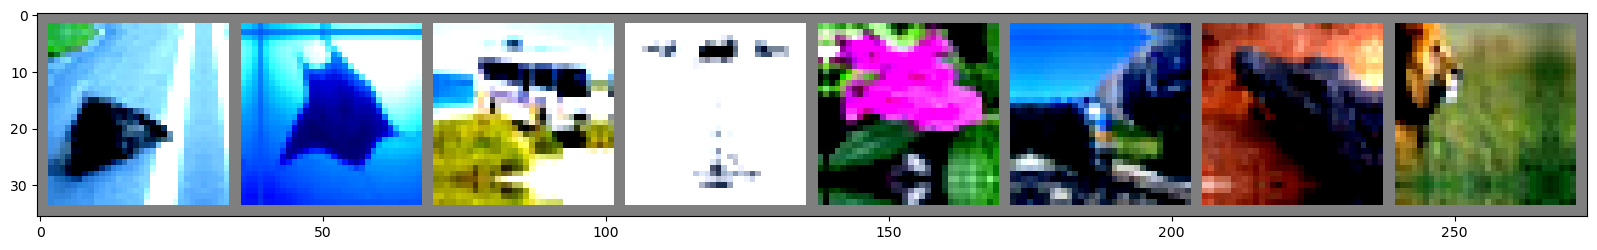

porcupine           ray                 bus                 cup                 orchid              train               crocodile           lion                


In [9]:
train_8_samples = DataLoader(train_data, 8, num_workers=4, pin_memory=True, shuffle=True)

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize = (20,20))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_8_samples)
images, labels =  next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print(''.join(f'{train_data.classes[labels[j]]:20s}' for j in range(8)))

In [15]:
def get_device():
    if torch.cuda.is_available():
        return torch.device("cuda")
    return torch.device("cpu")

def to_device(data,device):
    if isinstance(data,(list,tuple)):
        return [to_device(x,device) for x in data]
    return data.to(device,non_blocking=True)


class ToDeviceLoader:
    def __init__(self,data,device):
        self.data = data
        self.device = device

    def __iter__(self):
        for batch in self.data:
            yield to_device(batch,self.device)

    def __len__(self):
        return len(self.data)

In [16]:
device = get_device()
print(device)

train_dl = ToDeviceLoader(train_dl, device)
test_dl = ToDeviceLoader(test_dl, device)

cpu


In [17]:
def accuracy(predicted, actual):
    _, predictions = torch.max(predicted, dim=1)
    return torch.tensor(torch.sum(predictions==actual).item()/len(predictions))

In [18]:
class BaseModel(nn.Module):
    def training_step(self,batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out,labels)
        return loss

    def validation_step(self,batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out,labels)
        acc = accuracy(out,labels)
        return {"val_loss":loss.detach(),"val_acc":acc}

    def validation_epoch_end(self,outputs):
        batch_losses = [loss["val_loss"] for loss in outputs]
        loss = torch.stack(batch_losses).mean()
        batch_accuracy = [accuracy["val_acc"] for accuracy in outputs]
        acc = torch.stack(batch_accuracy).mean()
        return {"val_loss":loss.item(),"val_acc":acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F

def conv_shortcut(in_channel, out_channel, stride):
    layers = [nn.Conv2d(in_channel, out_channel, kernel_size=(1,1), stride=(stride, stride)),
             nn.BatchNorm2d(out_channel)]
    return nn.Sequential(*layers)

def block(in_channel, out_channel, k_size, stride, conv=False):
    first_layers = [nn.Conv2d(in_channel, out_channel[0], kernel_size=(1,1), stride=(1,1)),
                    nn.BatchNorm2d(out_channel[0]),
                    nn.ReLU(inplace=True)]
    if conv:
        first_layers[0].stride = (stride, stride)

    second_layers = [nn.Conv2d(out_channel[0], out_channel[1], kernel_size=(k_size, k_size), stride=(1,1), padding=1),
                     nn.BatchNorm2d(out_channel[1])]

    layers = first_layers + second_layers
    return nn.Sequential(*layers)

class ResNet(nn.Module):
    def __init__(self, in_channels, num_classes):
        super().__init__()

        self.stg1 = nn.Sequential(
            nn.Conv2d(in_channels=in_channels, out_channels=64, kernel_size=(3,3),
                      stride=(1,1), padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )

        # Stage 2
        self.convShortcut2 = conv_shortcut(64, 256, 1)
        self.conv2 = block(64, [64, 256], 3, 1, conv=True)
        self.ident2 = block(256, [64, 256], 3, 1)

        # Stage 3
        self.convShortcut3 = conv_shortcut(256, 512, 2)
        self.conv3 = block(256, [128, 512], 3, 2, conv=True)
        self.ident3 = block(512, [128, 512], 3, 1)

        # Stage 4
        self.convShortcut4 = conv_shortcut(512, 1024, 2)
        self.conv4 = block(512, [256, 1024], 3, 2, conv=True)
        self.ident4 = block(1024, [256, 1024], 3, 1)

        # Classifier
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(1024, num_classes)
        )

    def forward(self, x):
        x = self.stg1(x)

        # Stage 2
        x = F.relu(self.conv2(x) + self.convShortcut2(x))
        x = F.relu(self.ident2(x) + x)

        # Stage 3
        x = F.relu(self.conv3(x) + self.convShortcut3(x))
        x = F.relu(self.ident3(x) + x)

        # Stage 4
        x = F.relu(self.conv4(x) + self.convShortcut4(x))
        x = F.relu(self.ident4(x) + x)

        # Classifier
        x = self.classifier(x)
        
        return x

# Example usage
# model = ResNet(in_channels=3, num_classes=1000)
# inputs = torch.randn(1, 3, 224, 224)
# outputs = model(inputs)
# print(outputs.shape)


In [21]:
model = ResNet(3,100)

In [22]:
model = to_device(model, device)

In [23]:
@torch.no_grad()
def evaluate(model,test_dl):
    model.eval()
    outputs = [model.validation_step(batch) for batch in test_dl]
    return model.validation_epoch_end(outputs)

In [24]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit (epochs, train_dl, test_dl, model, optimizer, max_lr, weight_decay, scheduler, grad_clip=None):
    torch.cuda.empty_cache()

    history = []

    optimizer = optimizer(model.parameters(), max_lr, weight_decay = weight_decay)

    scheduler = scheduler(optimizer, max_lr, epochs=epochs, steps_per_epoch=len(train_dl))

    for epoch in range(epochs):
        model.train()

        train_loss = []

        lrs = []

        for batch in train_dl:
            loss = model.training_step(batch)

            train_loss.append(loss)

            loss.backward()

            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()
            optimizer.zero_grad()

            scheduler.step()
            lrs.append(get_lr(optimizer))
        result = evaluate(model, test_dl)
        result["train_loss"] = torch.stack(train_loss).mean().item()
        result["lrs"] = lrs

        model.epoch_end(epoch,result)
        history.append(result)

    return history


In [25]:
epochs = 100
optimizer = torch.optim.Adam
max_lr = 1e-3
grad_clip = 0.1
weight_decay = 1e-5
scheduler = torch.optim.lr_scheduler.OneCycleLR

In [26]:
history = fit(epochs=epochs, train_dl=train_dl, test_dl=test_dl, model=model,
              optimizer=optimizer, max_lr=max_lr, grad_clip=grad_clip,
              weight_decay=weight_decay, scheduler=torch.optim.lr_scheduler.OneCycleLR)

AttributeError: 'ResNet' object has no attribute 'training_step'

In [ ]:
def plot_acc(history):
    plt.plot([x["val_acc"] for x in history],"-x")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")

def plot_loss(history):
    plt.plot([x.get("train_loss") for x in history], "-bx")
    plt.plot([x["val_loss"] for x in history],"-rx")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train loss","val loss"])

def plot_lrs(history):
    plt.plot(np.concatenate([x.get("lrs",[]) for x in history]))
    plt.xlabel("Batch number")
    plt.ylabel("Learning rate")

IndexError: Target 17 is out of bounds.

In [28]:
train_dl

In [29]:
test_dl

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torchvision.transforms as transforms
import torchvision.datasets as datasets

# Define the ResNet model
class ResNet(nn.Module):
    def __init__(self, in_channels, num_classes):
        super().__init__()

        self.stg1 = nn.Sequential(
            nn.Conv2d(in_channels=in_channels, out_channels=64, kernel_size=(3, 3),
                      stride=(1, 1), padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )

        # Stage 2
        self.convShortcut2 = conv_shortcut(64, 256, 1)
        self.conv2 = block(64, [64, 256], 3, 1, conv=True)
        self.ident2 = block(256, [64, 256], 3, 1)

        # Stage 3
        self.convShortcut3 = conv_shortcut(256, 512, 2)
        self.conv3 = block(256, [128, 512], 3, 2, conv=True)
        self.ident3 = block(512, [128, 512], 3, 1)

        # Stage 4
        self.convShortcut4 = conv_shortcut(512, 1024, 2)
        self.conv4 = block(512, [256, 1024], 3, 2, conv=True)
        self.ident4 = block(1024, [256, 1024], 3, 1)

        # Classifier
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(1024, num_classes)
        )

    def forward(self, x):
        x = self.stg1(x)

        # Stage 2
        x = F.relu(self.conv2(x) + self.convShortcut2(x))
        x = F.relu(self.ident2(x) + x)

        # Stage 3
        x = F.relu(self.conv3(x) + self.convShortcut3(x))
        x = F.relu(self.ident3(x) + x)

        # Stage 4
        x = F.relu(self.conv4(x) + self.convShortcut4(x))
        x = F.relu(self.ident4(x) + x)

        # Classifier
        x = self.classifier(x)
        
        return x

def conv_shortcut(in_channel, out_channel, stride):
    layers = [nn.Conv2d(in_channel, out_channel, kernel_size=(1, 1), stride=(stride, stride)),
              nn.BatchNorm2d(out_channel)]
    return nn.Sequential(*layers)

def block(in_channel, out_channel, k_size, stride, conv=False):
    first_layers = [nn.Conv2d(in_channel, out_channel[0], kernel_size=(1, 1), stride=(1, 1)),
                    nn.BatchNorm2d(out_channel[0]),
                    nn.ReLU(inplace=True)]
    if conv:
        first_layers[0].stride = (stride, stride)

    second_layers = [nn.Conv2d(out_channel[0], out_channel[1], kernel_size=(k_size, k_size), stride=(1, 1), padding=1),
                     nn.BatchNorm2d(out_channel[1])]

    layers = first_layers + second_layers
    return nn.Sequential(*layers)

# Training settings
batch_size = 64
learning_rate = 0.001
num_epochs = 10

# Load dataset (CIFAR-10 as an example)
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Model, Loss, Optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet(in_channels=3, num_classes=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}")

# Testing loop
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total}%')



100%|████████████████████████████████████████████████████████████████| 170498071/170498071 [07:43<00:00, 368241.04it/s]


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified
